## Fetching Dataset

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist=fetch_openml('mnist_784')

In [3]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [4]:
(x,y)=(mnist['data'],mnist['target'])

In [5]:
x.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
%matplotlib inline

In [8]:
import matplotlib
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [9]:
some_digit=np.array(x.iloc[36003])
some_digit_image=some_digit.reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

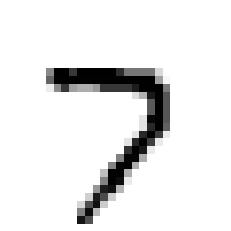

In [10]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation='nearest')
plt.axis('off')

In [11]:
 y[36003]

'7'

In [12]:
x_train,x_test=x[:60000],x[60000:]
y_train,y_test=y[:60000],y[60000:]

In [13]:
shuffle_index=np.random.permutation(60000)
x_train,y_train=np.array(x_train.iloc[shuffle_index]),y_train[shuffle_index]

## Creating a 7 Detector 

In [14]:
y_train=y_train.astype(np.int8)
y_test=y_test.astype(np.int8)
y_train_2=(y_train==7)
y_test_2=(y_test==7)


In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
clf=LogisticRegression(tol=0.1,solver='lbfgs')

In [17]:
clf.fit(x_train,y_train_2)

C:\Users\Akash Mishra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [18]:
clf.predict([some_digit])

array([ True])

In [19]:
from sklearn.model_selection import cross_val_score
z=cross_val_score(clf,x_train,y_train_2,cv=3,scoring='accuracy')

C:\Users\Akash Mishra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Akash Mishra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

In [20]:
z.mean()

0.9833

In [21]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf,x_train,y_train_2,cv=3)

C:\Users\Akash Mishra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Akash Mishra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

In [22]:
y_train_pred

array([False, False, False, ..., False, False, False])

Calculating confusion matrix

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(y_train_2,y_train_pred)

array([[53311,   424],
       [  578,  5687]], dtype=int64)

In [25]:
confusion_matrix(y_train_2,y_train_2)   # Perfect prediction CM

array([[53735,     0],
       [    0,  6265]], dtype=int64)

Precision and Recall

In [26]:
from sklearn.metrics import precision_score, recall_score

In [27]:
precision_score(y_train_2,y_train_pred)

0.930616920307642

In [28]:
recall_score(y_train_2,y_train_pred)

0.9077414205905826

F1 Score

In [29]:
from sklearn.metrics import f1_score

In [30]:
f1_score(y_train_2,y_train_pred)

0.9190368455074337

Precision Recall Curve

In [31]:
from sklearn.metrics import precision_recall_curve

In [32]:
y_scores = cross_val_predict(clf,x_train,y_train_2,cv=3,method="decision_function")

C:\Users\Akash Mishra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Akash Mishra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

In [33]:
y_scores

array([ -5.30687325, -10.62307419,  -6.25718145, ..., -14.67993413,
        -4.84166663, -15.70666243])

In [34]:
precisions,recalls,thresholds = precision_recall_curve(y_train_2,y_scores)

In [35]:
precisions

array([0.11548387, 0.11546757, 0.11546969, ..., 1.        , 1.        ,
       1.        ])

In [36]:
recalls

array([1.00000000e+00, 9.99840383e-01, 9.99840383e-01, ...,
       3.19233839e-04, 1.59616919e-04, 0.00000000e+00])

In [37]:
thresholds

array([-30.98987377, -30.98818595, -30.98813411, ...,  18.92097376,
        19.19495857,  21.0596279 ])

Plotting the Precision Recall Curve

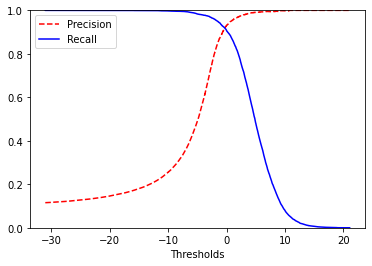

In [38]:
plt.plot(thresholds, precisions[:-1], "r--", label="Precision")
plt.plot(thresholds, recalls[:-1], "b-", label="Recall")
plt.xlabel('Thresholds')
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()